<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALMART/Ejercicio_PCA_clustering_dataAdriana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


datos originales = (2992, 16)
datos numericos = (2992, 10)
datos numericos sin NaNs = (1946, 10)
varianza explicada acumulada =[ 29.96540273  49.05169354  61.89097376  72.90042761  82.02558791
  89.77789524  95.62396707  98.57335388  99.39559842 100.        ]
Dimensionalidad datos en espacio PCA reducido = (1946, 6)


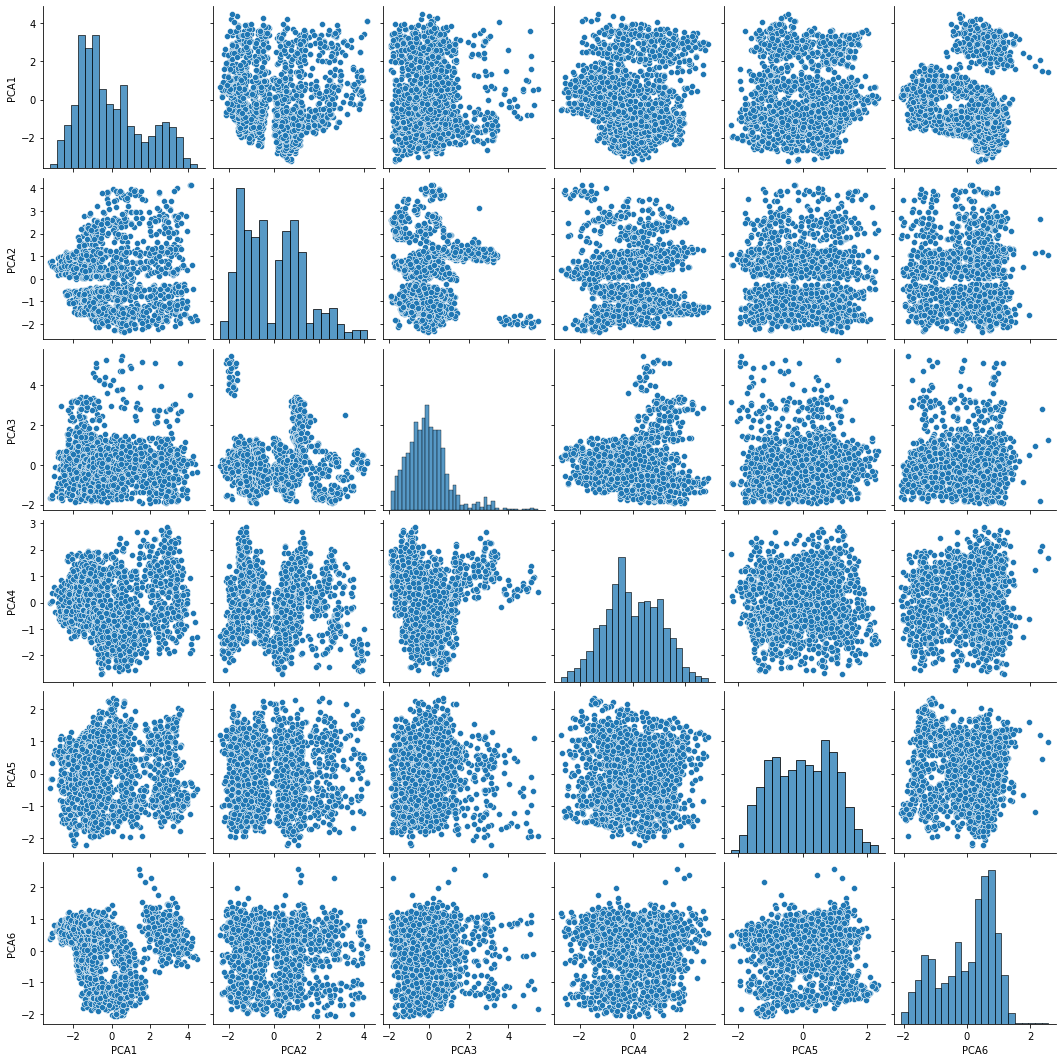

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')

df_num = df.select_dtypes(include='number') # keep only numeric variables 
df_num_nonans = df_num.dropna() # remove observations with NaNs

print('datos originales = {}'.format(df.shape))
print('datos numericos = {}'.format(df_num.shape))
print('datos numericos sin NaNs = {}'.format(df_num_nonans.shape))

X = df_num_nonans
y = df['OPENDATE'] # use origin as class label (not needed in PCA)

from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

from sklearn import decomposition
n_variables = df_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 6 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6'])
sns.pairplot(d)
plt.show()









In [7]:
group = KMeans(n_clusters=2).fit_predict(XPCA)
print(group)

[1 1 1 ... 0 0 0]


In [12]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='x',y='y',hue='kmeans',data=df)
plt.show()

ValueError: ignored

<Figure size 720x720 with 0 Axes>

Descripcion del dataset

In [31]:
df.describe()


,storenum,conversion,st,county,ZIPCODE,LAT,LON,MONTH,DAY,YEAR
count,2992.000000,1946.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,1809.838235,0.800103,28.956217,101.030414,54077.080882,36.803160,-91.582521,6.432487,15.108623,1990.793783
std,1362.727189,0.400026,16.061538,105.534836,23652.129967,4.818443,12.051487,3.492092,10.999463,8.572069
min,1.000000,0.000000,1.000000,1.000000,10547.000000,25.431506,-124.210860,1.000000,1.000000,1962.000000
25%,777.750000,1.000000,16.000000,37.000000,33522.000000,33.415925,-96.681565,3.000000,3.000000,1985.000000
50%,1540.500000,1.000000,29.000000,77.000000,52648.000000,36.753618,-88.955250,7.000000,16.000000,1990.000000
75%,2534.250000,1.000000,45.000000,125.000000,75061.500000,40.409729,-82.619280,10.000000,26.000000,1998.000000
max,5498.000000,1.000000,56.000000,840.000000,99352.000000,48.759079,-72.637078,12.000000,31.000000,2006.000000


NameError: ignored

Aplicar Clean data 

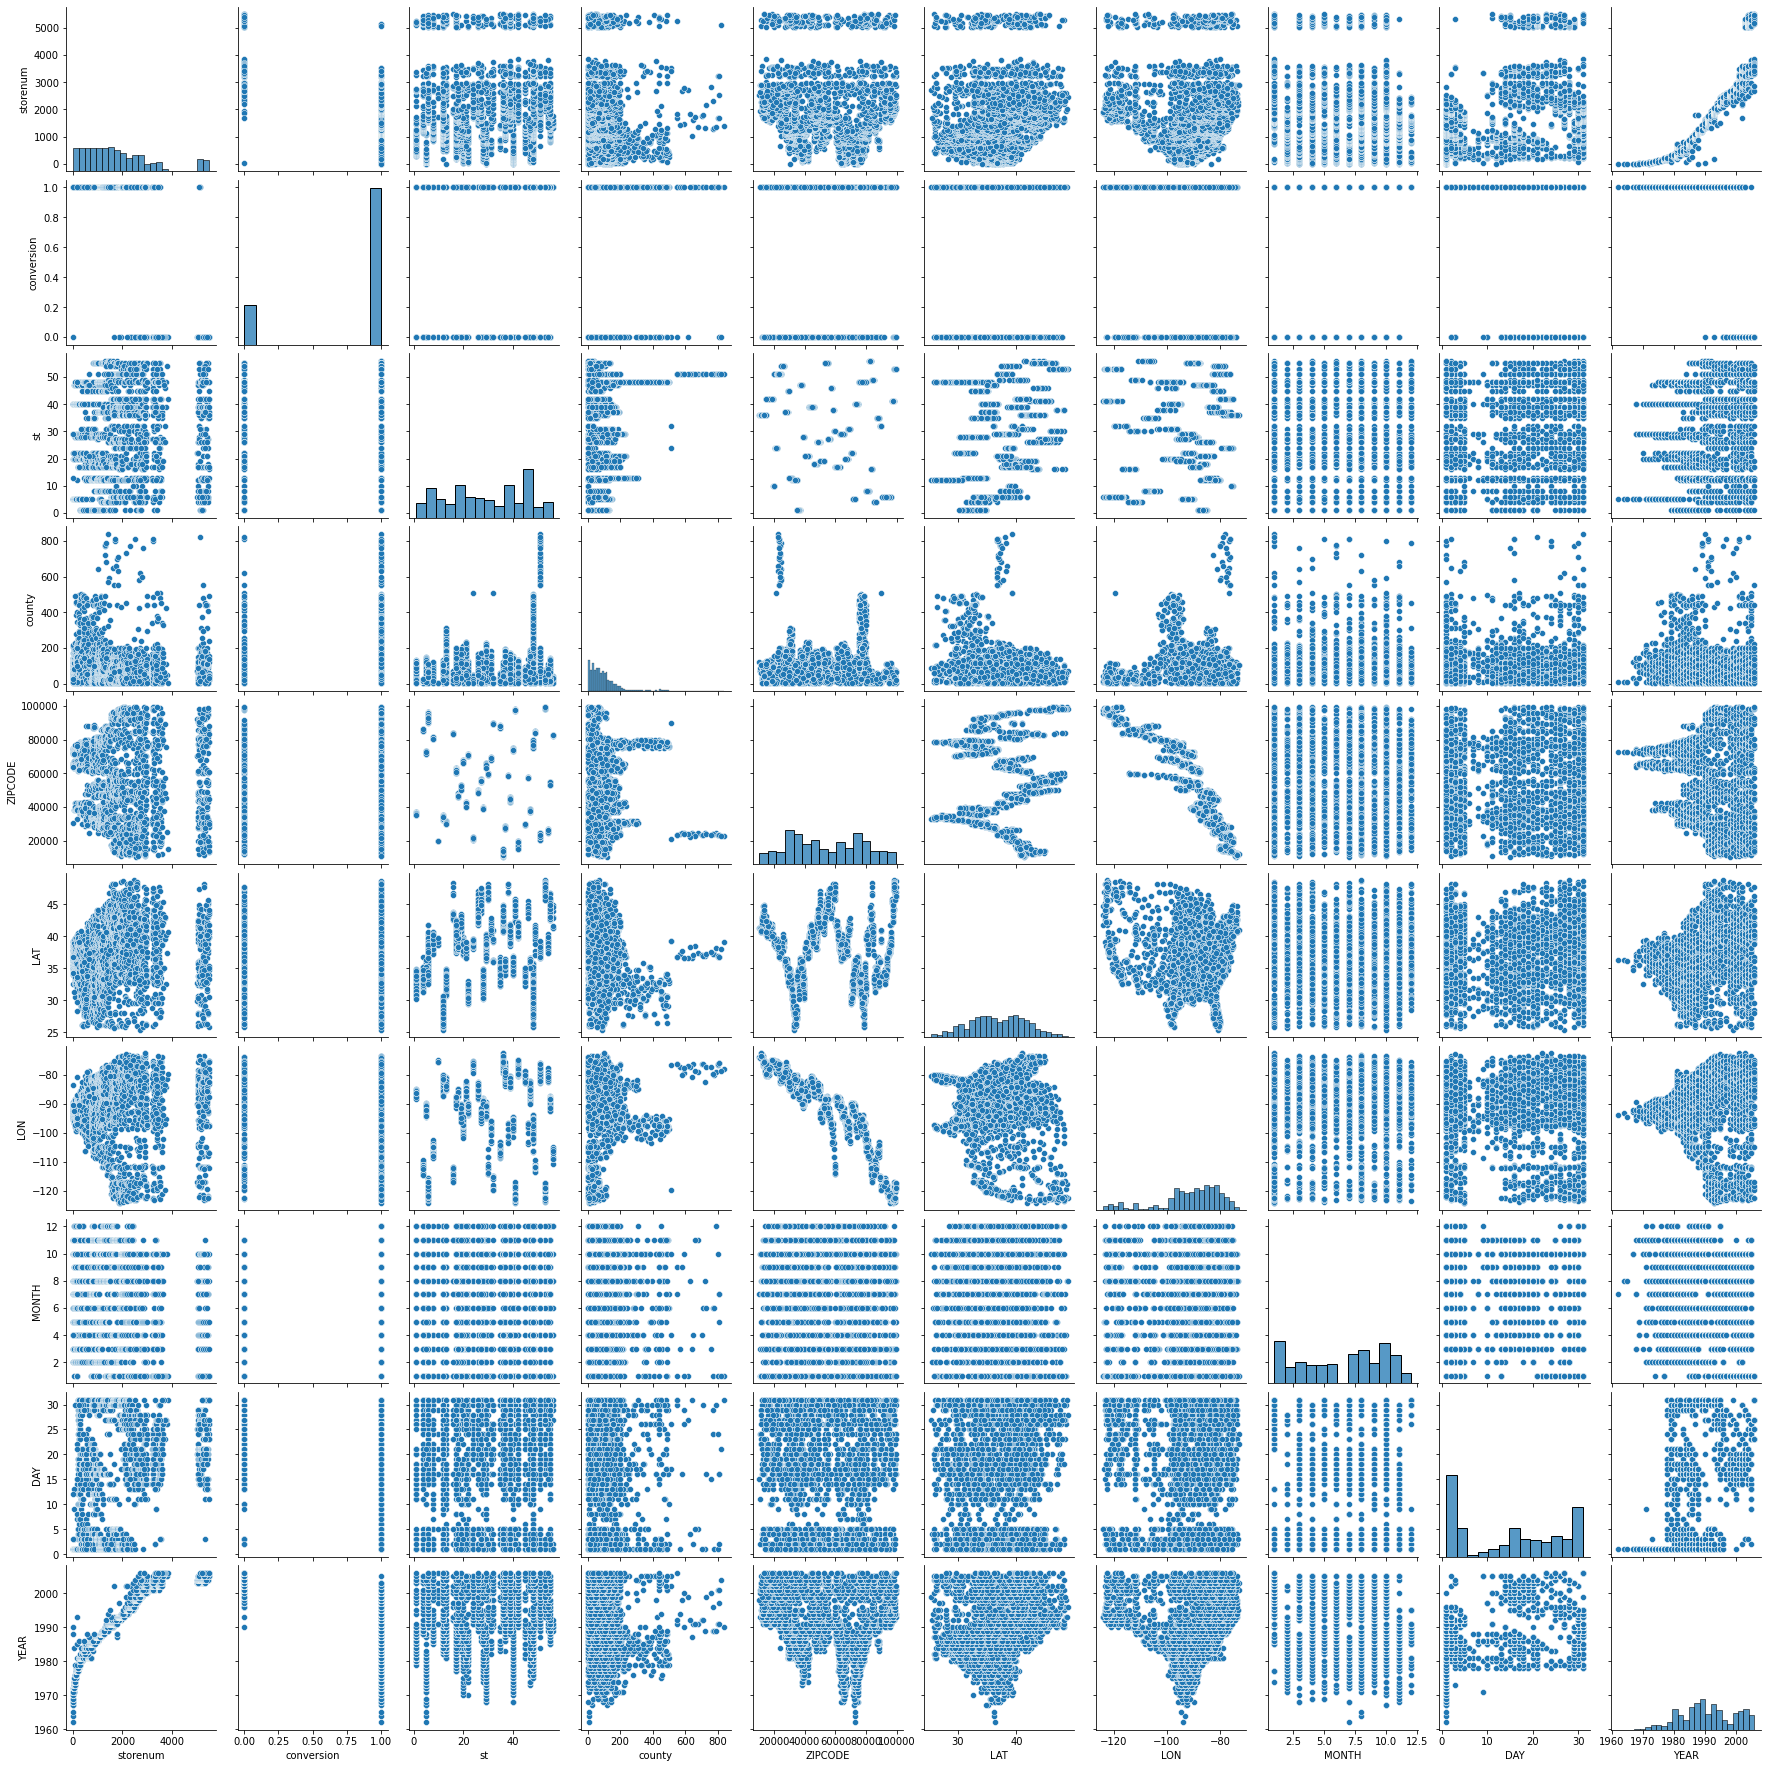

In [12]:
import seaborn as sns
sns.pairplot(df)


In [58]:
df_agrupats = df.groupby(by=['type_store'])
df_agrupats.mean()

,storenum,conversion,st,county,ZIPCODE,LAT,LON,MONTH,DAY,YEAR
type_store,,,,,,,,,,
Supercenter,1812.987153,0.800103,30.091470,110.303186,52685.101747,36.201172,-90.581093,6.483556,14.959918,1990.538027
Wal-Mart,1803.979924,NaN,26.844168,83.779159,56666.747610,37.923111,-93.445597,6.337476,15.385277,1991.269598
